In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from ggplot import *

# Fit xgboost to see how many strong features we got

In [3]:
train = pd.read_csv('train_all_features.csv')
test = pd.read_csv('test_all_features.csv')

In [4]:
train.shape

(30396, 428)

In [5]:
test.shape

(7662, 427)

In [6]:
label = train['price_doc']*0.968+10

In [28]:
col = list(test.columns)[2:318] # Get rid of the interaction

In [29]:
dtrain = xgb.DMatrix(train[col],label)
dtest = xgb.DMatrix(test[col])

[0]	train-rmse:7.93271e+06	test-rmse:7.93799e+06
[50]	train-rmse:2.33639e+06	test-rmse:2.68681e+06
[100]	train-rmse:2.02555e+06	test-rmse:2.50275e+06
[150]	train-rmse:1.90839e+06	test-rmse:2.45746e+06
[200]	train-rmse:1.82482e+06	test-rmse:2.43641e+06
[250]	train-rmse:1.75712e+06	test-rmse:2.42349e+06
[300]	train-rmse:1.70105e+06	test-rmse:2.41659e+06
[350]	train-rmse:1.64926e+06	test-rmse:2.41193e+06
[400]	train-rmse:1.59889e+06	test-rmse:2.40849e+06
[450]	train-rmse:1.55251e+06	test-rmse:2.4077e+06
[500]	train-rmse:1.50858e+06	test-rmse:2.40541e+06
[550]	train-rmse:1.468e+06	test-rmse:2.40425e+06
[600]	train-rmse:1.43122e+06	test-rmse:2.40289e+06
Performance does not improve from 601 rounds


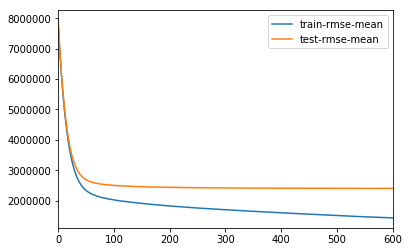

In [30]:
params = {
    'eta': 0.05, ## Try 0.01,3,5
    'max_depth': 5,## Try 4,5,6
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=50,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [31]:
def get_feature_importance(model):
    Importance = model.get_fscore()
    Importance = list(Importance.items())
    Feature= []
    Score = []
    for each in Importance:
        Feature.append(each[0])
        Score.append(each[1])
    df = pd.DataFrame({'Feature':Feature,'Score':Score}).sort_values(by=['Score'],ascending=[0])
    return df  

def plot_importance(model):
    FImportance = get_feature_importance(model).iloc[0:50,]
    plt.figure()
    FImportance.plot(kind='barh', x='Feature', y='Score', legend=False, figsize=(6, 10))
    plt.title('XGBoost Feature Importance')
    plt.show()

In [32]:
model = xgb.train(params,dtrain,num_boost_round=len(xgb_cvalid))

In [34]:
feature_importance=get_feature_importance(model)

In [36]:
feature_importance = feature_importance[feature_importance['Score']>100]

In [40]:
features = list(feature_importance['Feature'])

In [44]:
features

['full_sq',
 'life_sq',
 'extra_area',
 'floor',
 'build_year',
 'max_floor',
 'rel_kitch_sq',
 'micex_cbi_tr',
 'eurrub',
 'kindergarten_km',
 'kitch_sq',
 'micex_rgbi_tr',
 'tsne_1',
 'floor_ratio',
 'state',
 'room_avg_size',
 'hospice_morgue_km',
 'num_room',
 'railroad_km',
 'room_size',
 'balance_trade',
 'school_km',
 'mosque_km',
 'public_healthcare_km',
 'tsne_2',
 'radiation_km',
 'green_zone_km',
 'public_transport_station_km',
 'metro_min_avto',
 'cemetery_km']

## Prepare sklearn CV sets

In [148]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error as mse

In [149]:
train_sklearn = train[features].fillna(-999)
test_sklearn = test[features].fillna(-999)
training = train_sklearn.iloc[:round(len(train)*0.8),:]
testing = train_sklearn.iloc[round(len(train)*0.8):,:]
label_train = label[:round(len(train)*0.8)]
label_test = label[round(len(train)*0.8):]

## Only Fit XGB on 30 features

In [53]:
dtrain = xgb.DMatrix(train[features],label)
dtest = xgb.DMatrix(test[features])

[0]	train-rmse:7.65994e+06	test-rmse:7.66107e+06
[50]	train-rmse:2.75485e+06	test-rmse:2.86509e+06
[100]	train-rmse:2.54098e+06	test-rmse:2.72456e+06
[150]	train-rmse:2.41957e+06	test-rmse:2.66385e+06
[200]	train-rmse:2.33567e+06	test-rmse:2.63007e+06
[250]	train-rmse:2.26295e+06	test-rmse:2.60143e+06
[300]	train-rmse:2.20196e+06	test-rmse:2.58259e+06
[350]	train-rmse:2.14912e+06	test-rmse:2.56647e+06
[400]	train-rmse:2.10044e+06	test-rmse:2.55451e+06
[450]	train-rmse:2.05962e+06	test-rmse:2.54836e+06
[500]	train-rmse:2.02138e+06	test-rmse:2.54287e+06
[550]	train-rmse:1.98662e+06	test-rmse:2.53699e+06
[600]	train-rmse:1.95111e+06	test-rmse:2.53282e+06
[650]	train-rmse:1.91753e+06	test-rmse:2.52666e+06
[700]	train-rmse:1.88743e+06	test-rmse:2.52422e+06
[750]	train-rmse:1.85825e+06	test-rmse:2.52073e+06
[800]	train-rmse:1.83117e+06	test-rmse:2.51776e+06
[850]	train-rmse:1.80449e+06	test-rmse:2.51447e+06
[900]	train-rmse:1.77969e+06	test-rmse:2.51092e+06
[950]	train-rmse:1.75445e+06	test-

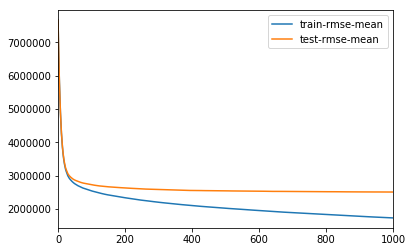

In [51]:
params = {
    'eta': 0.1, ## Try 0.01,3,5
    'max_depth': 4,## Try 4,5,6
    'subsample': 0.5,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1,
    'lambda':90
}

xgb_cvalid = xgb.cv(params, dtrain, num_boost_round=1000, early_stopping_rounds=50,
    verbose_eval=50, show_stdv=False,seed=42)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print('Performance does not improve from '+str(len(xgb_cvalid))+' rounds')

In [52]:
model = xgb.train(params,dtrain,num_boost_round=len(xgb_cvalid))

In [54]:
pred = model.predict(dtest)

In [55]:
pred

array([ 5850892.5,  7975388. ,  5885527.5, ...,  4507409. ,  4910183.5,
        8651836. ], dtype=float32)

In [56]:
ss = pd.read_csv('sub.csv')['price_doc']

In [87]:
Averaged = 0.2*pred + 0.8*ss 

In [88]:
def mean_error(line1,line2):
    error = [x-y for x,y in zip(line1,line2)]
    return np.mean(error)

In [89]:
mean_error(ss,Averaged)

-88057.165733490256

In [90]:
def Count_less_values(line1,line2):
    lst = [1 if x<y else 0 for x,y in zip(line1,line2)]
    return sum(lst)/len(line1)

In [91]:
Count_less_values(ss,Averaged)

0.7462803445575568

In [97]:
list(Averaged)

[5427560.5,
 7925715.625,
 5431374.2999999998,
 5702201.875,
 4850132.8375000004,
 9277303.6000000015,
 4165481.4875000003,
 4221268.5,
 4847514.875,
 4715650.375,
 6437786.3000000007,
 4718695.5999999996,
 3785146.2875000001,
 3863779.5875000004,
 6041861.25,
 6113395.875,
 22621416.699999999,
 19134247.600000001,
 5710598.2000000002,
 13438200.0,
 6583731.8500000006,
 10648046.4,
 9041501.9499999993,
 8411028.8000000007,
 4524477.6125000007,
 7661370.4000000004,
 10979870.550000001,
 6894938.8250000002,
 3049293.9375,
 6382990.0500000007,
 5830164.9500000002,
 10835892.85,
 3208568.4624999999,
 4728667.3250000002,
 5334004.2250000006,
 7427748.1750000007,
 9076616.4250000007,
 6728499.2750000004,
 6254644.5,
 4188092.2125000004,
 3411456.5375000001,
 9437286.4250000007,
 5839901.4750000006,
 11034493.35,
 8018461.2250000006,
 4509680.5250000004,
 6952291.1750000007,
 5926171.2000000002,
 7393069.2750000004,
 6313895.9500000002,
 10468524.850000001,
 10588470.875,
 4790763.5125000002,

In [98]:
list(ss)

[5321727.5,
 7913297.5,
 5317836.0,
 5614242.5,
 4825603.0,
 9021227.0,
 4116632.25,
 4114026.25,
 4636835.0,
 4579642.5,
 6313358.5,
 4801617.0,
 3562420.75,
 3704550.5,
 5882587.5,
 6032240.0,
 22008274.0,
 19286642.0,
 5607864.0,
 13305835.0,
 6441987.0,
 10408293.0,
 8613839.0,
 8301666.0,
 4458758.5,
 7800583.0,
 10800126.0,
 6730939.0,
 2997173.75,
 6500436.0,
 5686579.0,
 10976022.0,
 3141331.75,
 4616956.5,
 5251287.0,
 7387528.5,
 8942031.0,
 6465233.0,
 6206890.0,
 4125644.25,
 3356499.5,
 9391656.0,
 5741037.0,
 10971752.0,
 7931332.0,
 4430545.5,
 6850426.0,
 5671144.0,
 7444525.5,
 6367111.5,
 10444567.0,
 11401420.0,
 4718081.5,
 4824940.5,
 6594672.5,
 6500417.5,
 6068105.5,
 14284501.0,
 4658749.5,
 10352717.0,
 6491645.5,
 9224773.0,
 5672177.0,
 11445542.0,
 5006657.5,
 8775961.0,
 9365789.0,
 5642116.0,
 2091772.0,
 5638415.0,
 6736294.5,
 8433830.0,
 4053088.25,
 9373867.0,
 4359644.0,
 5017106.0,
 11847396.0,
 4990616.0,
 1853030.5,
 7248442.0,
 10682794.0,
 603514

In [92]:
best_single = pd.read_csv('xgb_0.95label.csv')['price_doc']

In [93]:
mean_error(best_single,Averaged)

-184279.15883255054